In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\WINDOWS10\Downloads\Sport car price.csv")
df

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5,1280,1106,2.5,"3,000,000"
1003,Lotus,Evija,2021,Electric Motor,1972,1254,2,"2,000,000"
1004,McLaren,Senna,2021,4,789,590,2.7,"1,000,000"
1005,Pagani,Huayra,2021,6,764,738,3,"2,600,000"


In [4]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)         
# pd.set_option('display.max_colwidth', None)
# print(df)

In [5]:
df.shape

(1007, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 1007 non-null   object
 1   Car Model                1007 non-null   object
 2   Year                     1007 non-null   int64 
 3   Engine Size (L)          997 non-null    object
 4   Horsepower               1007 non-null   object
 5   Torque (lb-ft)           1004 non-null   object
 6   0-60 MPH Time (seconds)  1007 non-null   object
 7   Price (in USD)           1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


In [7]:
# first converting to string,removing commas and converting to float:
# ^ (inside [])	Negation — match any character not listed
# 0-9	Any digit from 0 to 9
# .	A dot (literal decimal point, because inside brackets it's not special)
columns_to_clean = ['Horsepower','Torque (lb-ft)','Price (in USD)']
for col in columns_to_clean:
    df[col] = df[col].astype(str).str.replace('[^0-9.]','',regex=True)
    df[col] = df[col].replace('','0')
    df[col] = df[col].astype(float)

In [8]:
# check
df[columns_to_clean].dtypes
df.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379.0,331.0,4,101200.0
1,Lamborghini,Huracan,2021,5.2,630.0,443.0,2.8,274390.0
2,Ferrari,488 GTB,2022,3.9,661.0,561.0,3,333750.0
3,Audi,R8,2022,5.2,562.0,406.0,3.2,142700.0
4,McLaren,720S,2021,4,710.0,568.0,2.7,298000.0


In [9]:
df[['Engine Size (L)', 'Torque (lb-ft)']].isnull().sum()

Engine Size (L)    10
Torque (lb-ft)      0
dtype: int64

In [10]:
df = df.dropna(subset=['Engine Size (L)', 'Torque (lb-ft)'])

In [11]:
df[['Engine Size (L)', 'Torque (lb-ft)']].isnull().sum()

Engine Size (L)    0
Torque (lb-ft)     0
dtype: int64

In [12]:
df["Price (in USD)"].describe()

count    9.970000e+02
mean     3.750079e+05
std      7.297674e+05
min      2.500000e+04
25%      7.180000e+04
50%      1.399900e+05
75%      2.480000e+05
max      5.200000e+06
Name: Price (in USD), dtype: float64

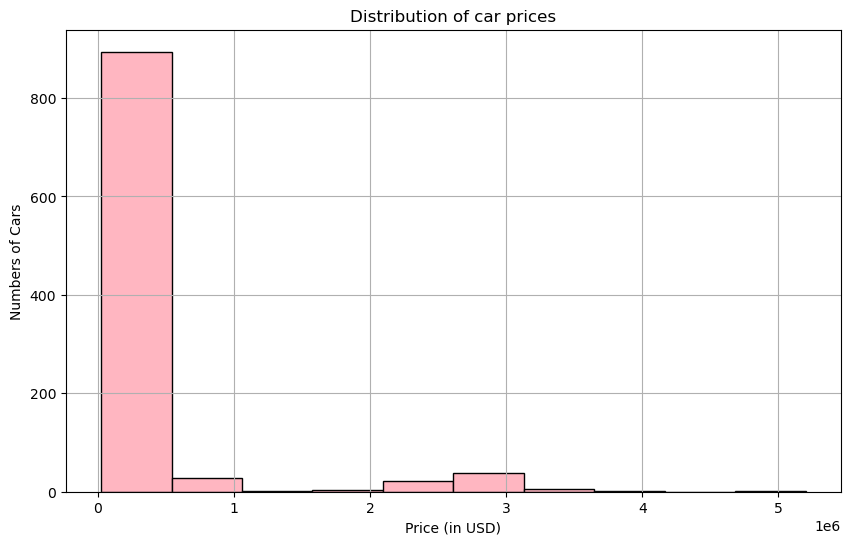

In [13]:
plt.figure(figsize=(10,6))
plt.hist(df["Price (in USD)"],bins= 10,color='lightpink',edgecolor='black')
plt.title('Distribution of car prices')
plt.xlabel('Price (in USD)')
plt.ylabel('Numbers of Cars')
plt.grid()
plt.show()

In [14]:
# how prices vary by carmake:
print(df.columns)

Index(['Car Make', 'Car Model', 'Year', 'Engine Size (L)', 'Horsepower',
       'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Price (in USD)'],
      dtype='object')


In [15]:
price_by_make =df.groupby('Car Make')['Price (in USD)'].mean().sort_values(ascending =False)
print(price_by_make)

Car Make
Bugatti          3.251957e+06
Koenigsegg       2.906667e+06
Pagani           2.791667e+06
Pininfarina      2.500000e+06
Rimac            2.400000e+06
W Motors         2.216667e+06
Shelby           1.000000e+06
Lotus            4.439781e+05
Lamborghini      4.259472e+05
Ferrari          4.100991e+05
Ford             3.688295e+05
Rolls-Royce      3.332350e+05
McLaren          2.978079e+05
Ultima           2.200000e+05
Bentley          2.156290e+05
Aston Martin     2.150791e+05
Mercedes-AMG     1.693636e+05
Mercedes-Benz    1.646614e+05
Tesla            1.617093e+05
Acura            1.578741e+05
Polestar         1.550000e+05
Maserati         1.476562e+05
TVR              1.405000e+05
Porsche          1.294093e+05
Audi             9.387493e+04
Lexus            9.322885e+04
Jaguar           8.311833e+04
BMW              8.013413e+04
Ariel            7.500000e+04
Alfa Romeo       7.413406e+04
Alpine           7.150000e+04
Dodge            7.097683e+04
Chevrolet        5.524692e+04
K

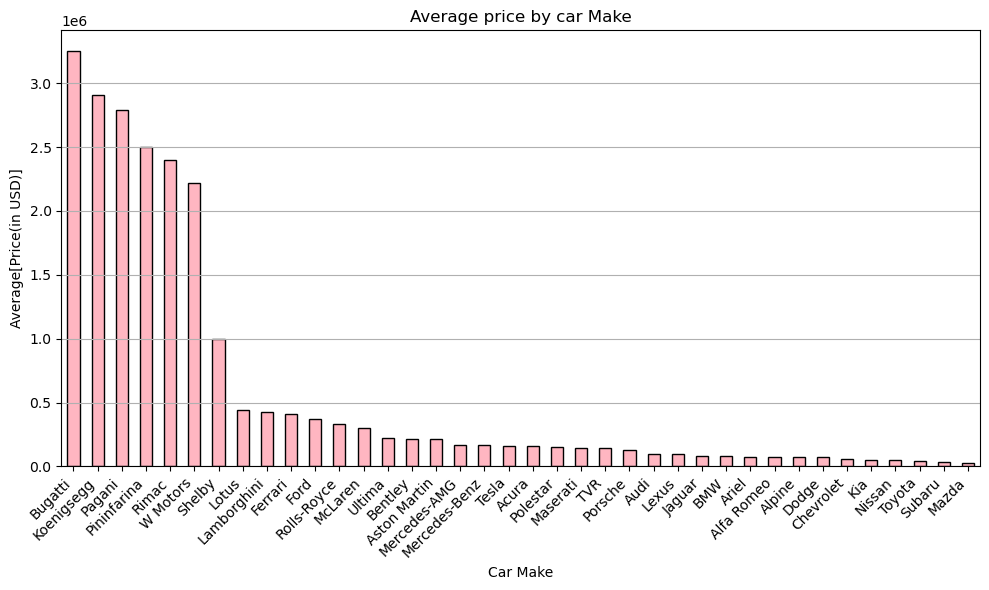

In [16]:
plt.figure(figsize=(10,6))
price_by_make.plot(kind='bar',color='lightpink',edgecolor='black')
plt.title('Average price by car Make')
plt.xlabel('Car Make')
plt.ylabel('Average[Price(in USD)]')
# rotation=45: Rotates each x-axis label by 45 degrees to avoid overlap.
# ha='right': Horizontally aligns the label text to the right.
# (ha stands for horizontal alignment)
plt.xticks(rotation=45,ha='right')
# This automatically adjusts spacing between elements (titles, labels, axes) so they don’t overlap or get cut off.
plt.tight_layout()
plt.grid(axis ='y')
plt.show()

In [17]:
cheapest = df.sort_values(by='Price (in USD)').head(10)
print(cheapest[['Car Make', 'Car Model', 'Price (in USD)']])

      Car Make   Car Model  Price (in USD)
597  Chevrolet      Camaro         25000.0
924  Chevrolet      Camaro         25000.0
886  Chevrolet      Camaro         25000.0
997  Chevrolet      Camaro         25000.0
92       Mazda  MX-5 Miata         26830.0
998       Ford     Mustang         27205.0
707      Dodge  Challenger         28000.0
895     Nissan        370Z         30000.0
317     Nissan        370Z         30000.0
203     Nissan        370Z         30090.0


In [18]:
most_expensive = df.sort_values(by= 'Price (in USD)',ascending =False).head(10)
print(most_expensive[['Car Make', 'Car Model', 'Price (in USD)']])

        Car Make                Car Model  Price (in USD)
541      Bugatti  Chiron Super Sport 300+       5200000.0
823      Bugatti  Chiron Super Sport 300+       5200000.0
983      Bugatti                   Chiron       3900000.0
438  Lamborghini                     Sián       3600000.0
624      Bugatti         Chiron Pur Sport       3599000.0
385       Pagani                   Huayra       3500000.0
279       Pagani       Huayra Roadster BC       3500000.0
174     W Motors         Lykan Hypersport       3400000.0
85       Bugatti                   Chiron       3000000.0
113      Bugatti                   Chiron       3000000.0


In [19]:
# most common engine sizes:
df['Engine Size (L)'].value_counts().head(10)

Engine Size (L)
4           219
6.2         113
3            85
3.5          79
5            68
6.5          46
3.8          38
Electric     36
3.7          35
2            34
Name: count, dtype: int64

In [20]:
# Clean & Convert to float,string Engine Size:
df= df.copy()
df['Engine Size (L)'] =df['Engine Size (L)'].astype(str).str.replace('[^0-9.]','',regex=True)
df['Engine Size (L)'] =df['Engine Size (L)'].replace('','0').astype(float)

In [21]:
price_by_engine=df.groupby('Engine Size (L)')['Price (in USD)'].mean().sort_values(ascending=False)
print(price_by_engine)

Engine Size (L)
8.0      3.251957e+06
4.6      1.800000e+06
6.0      1.320671e+06
0.0      1.087769e+06
7.0      1.000000e+06
5.0      7.098494e+05
6.5      5.192041e+05
6.7      3.380000e+05
6.6      3.354333e+05
6.8      3.313417e+05
3.8      2.872051e+05
3.5      2.844461e+05
5.2      2.588010e+05
6.3      2.545000e+05
3.9      2.531573e+05
4.0      2.348453e+05
1.5      1.478333e+05
4.7      1.426698e+05
3.7      1.375380e+05
100.0    1.311900e+05
8.4      1.216617e+05
4.4      1.083636e+05
93.0     1.038000e+05
3.0      9.095776e+04
6.2      9.054332e+04
5.5      8.500000e+04
2.9      7.980167e+04
1.8      6.913167e+04
1.7      6.761250e+04
2.0      6.475086e+04
2.5      6.401600e+04
6.4      6.200000e+04
3.3      5.220000e+04
5.7      3.500000e+04
3.6      2.800000e+04
2.3      2.720500e+04
Name: Price (in USD), dtype: float64


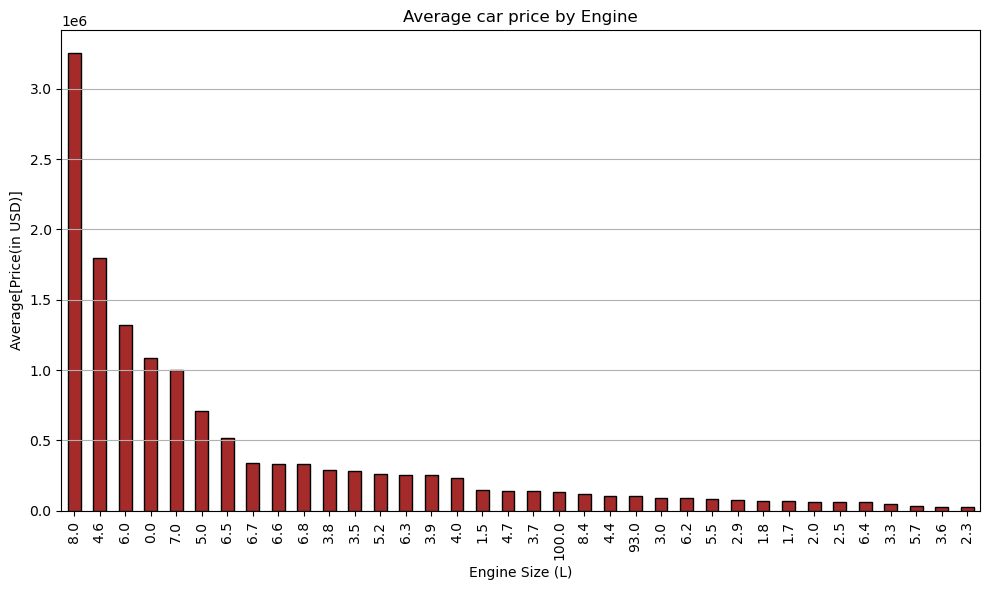

In [22]:
plt.figure(figsize=(10,6))
price_by_engine.plot(kind='bar',color='brown',edgecolor='black')
plt.title('Average car price by Engine')
plt.xlabel('Engine Size (L)')
plt.ylabel('Average[Price(in USD)]')
plt.tight_layout()
plt.grid(axis ='y')
plt.show()

In [23]:
# Which brands have the highest average horsepower or torque?
df['Horsepower'] =df['Horsepower'].astype(str).str.replace('[^0-9.]','',regex=True)
df['Horsepower'] =df['Horsepower'].replace('','0').astype(float)

df['Torque (lb-ft)'] =df['Torque (lb-ft)'].astype(str).str.replace('[^0-9.]','',regex=True)
df['Torque (lb-ft)'] =df['Torque (lb-ft)'].replace('','0').astype(float)

In [24]:
avg_hp_by_brand =df.groupby('Car Make')['Horsepower'].mean().sort_values(ascending=False)
avg_tq_by_brand =df.groupby('Car Make')['Torque (lb-ft)'].mean().sort_values(ascending=False)

In [25]:
print("top 10 brands by Horsepower")
print(avg_hp_by_brand.head(10))

top 10 brands by Horsepower
Car Make
Rimac          1911.636364
Pininfarina    1873.000000
Tesla          1612.000000
Bugatti        1502.217391
Koenigsegg     1364.133333
Ultima         1200.000000
Ferrari         795.672727
W Motors        793.333333
Pagani          758.333333
Lamborghini     713.075758
Name: Horsepower, dtype: float64


In [26]:
print("top 10 brands by Torque (lb-ft)")
print(avg_tq_by_brand.head(10))

top 10 brands by Torque (lb-ft)
Car Make
Tesla          1865.800000
Rimac          1702.545455
Pininfarina    1696.000000
Ultima         1300.000000
Bugatti        1180.000000
Koenigsegg     1069.600000
Pagani          744.000000
Polestar        738.000000
W Motors        718.000000
Dodge           641.000000
Name: Torque (lb-ft), dtype: float64


In [27]:
# cleaning price:
df['Price (in USD)']= df['Price (in USD)'].astype(str).str.replace('[^0-9.]','',regex=True)
df['Price (in USD)']=df['Price (in USD)'].replace('','0').astype(float)

In [28]:
# checking corealtion of engine sizes with horsepower and price:
corr_hp =df['Horsepower'].corr(df['Horsepower'])
corr_price =df['Price (in USD)'].corr(df['Price (in USD)'])

In [29]:
# printing corelation with 2 float:
print(f"coorelation of engine size with horsepower{corr_hp:.2f}")
print(f"coorelation of engine size with price{corr_price:.2f}")

coorelation of engine size with horsepower1.00
coorelation of engine size with price1.00


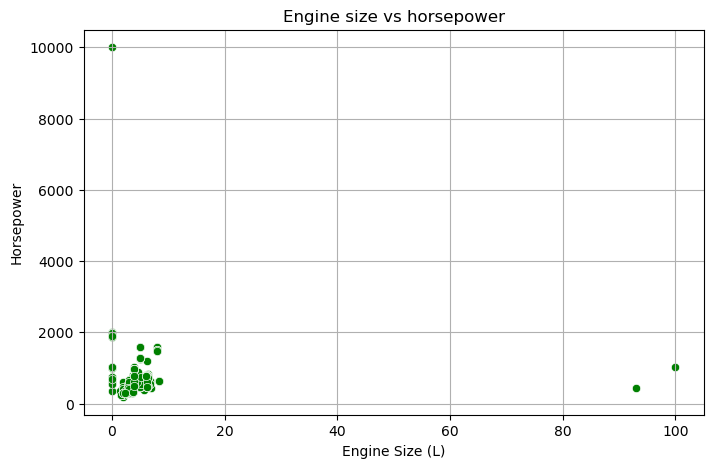

In [30]:
#Engine size vs horsepower:
#     figsize=(width, height)
plt.figure(figsize=(8,5))
sns.scatterplot(x='Engine Size (L)',y='Horsepower',data=df,color="green")
plt.title("Engine size vs horsepower")
plt.grid()
plt.show()

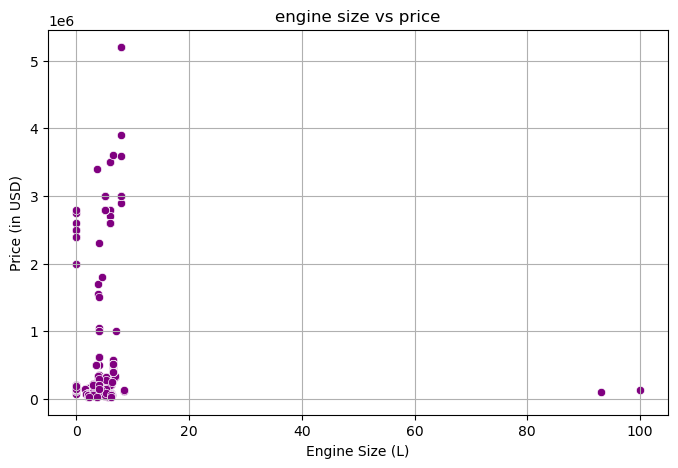

In [31]:
#engine size vs price:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Engine Size (L)',y='Price (in USD)',data=df,color="purple")
plt.title("engine size vs price")
plt.grid()
plt.show()

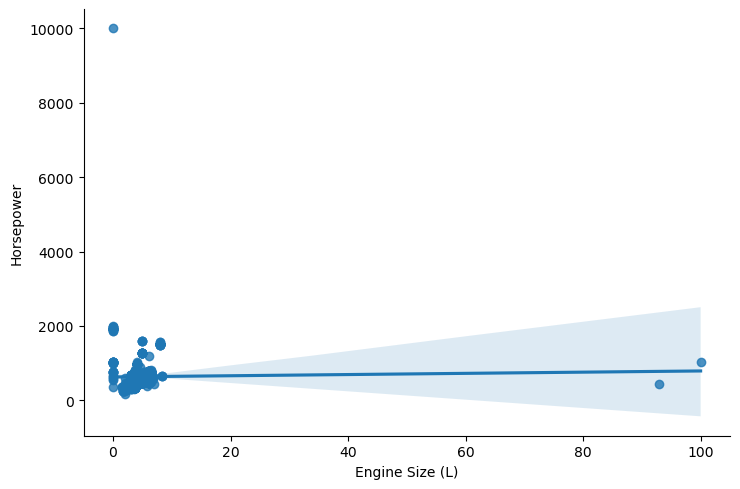

In [32]:
# Plot a scatterplot with a linear regression line.
# aspect:To adjust how wide or tall your plot appears,1-5 =7.5" x 5" (wide)
sns.lmplot(x='Engine Size (L)',y='Horsepower',data=df,height=5,aspect=1.5)
plt.show()

In [33]:
# cleaning,horsepower,Torque:
df['0-60 MPH Time (seconds)'] = df['0-60 MPH Time (seconds)'].astype(str).str.replace('[^0-9.]', '',regex=True)
df['0-60 MPH Time (seconds)'] = pd.to_numeric(df['0-60 MPH Time (seconds)'],errors ='coerce')

df['Horsepower'] = df['Horsepower'].astype(str).str.replace('[^0-9.]', '',regex=True)
df['Horsepower'] = pd.to_numeric(df['Horsepower'],errors ='coerce')

df['Torque (lb-ft)'] = df['Torque (lb-ft)'].astype(str).str.replace('[^0-9.]', '',regex=True)
df['Torque (lb-ft)'] = pd.to_numeric(df['Torque (lb-ft)'],errors ='coerce')


In [34]:
# Does 0-60 MPH time correlate with horsepower or torque?:
corr_hp = df['Horsepower'].corr(df['0-60 MPH Time (seconds)'])
corr_torque = df['Torque (lb-ft)'].corr(df['0-60 MPH Time (seconds)'])

print(f"Correlation with Horsepower: {corr_hp:.2f}")
print(f"Correlation with Torque: {corr_torque:.2f}")

Correlation with Horsepower: -0.56
Correlation with Torque: -0.44


In [35]:
# for Checking Columns:
print(df.columns)


Index(['Car Make', 'Car Model', 'Year', 'Engine Size (L)', 'Horsepower',
       'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Price (in USD)'],
      dtype='object')


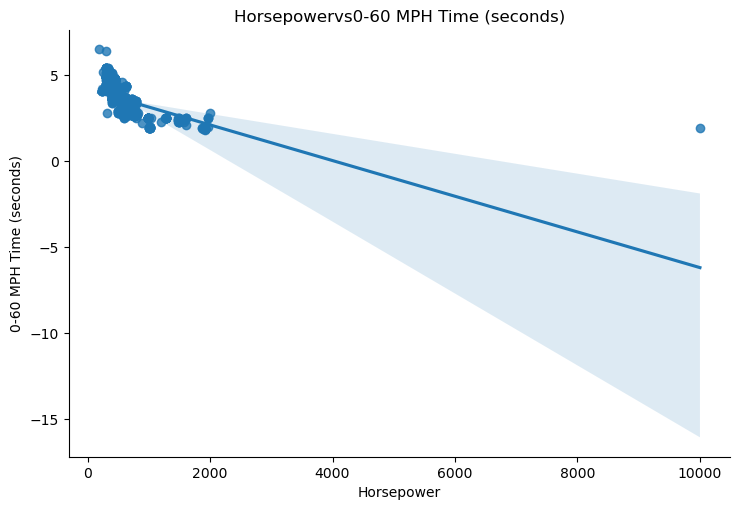

In [36]:
sns.lmplot(data=df, x ='Horsepower', y='0-60 MPH Time (seconds)' , height =5 , aspect =1.5)
plt.title("Horsepowervs0-60 MPH Time (seconds)")
plt.show()

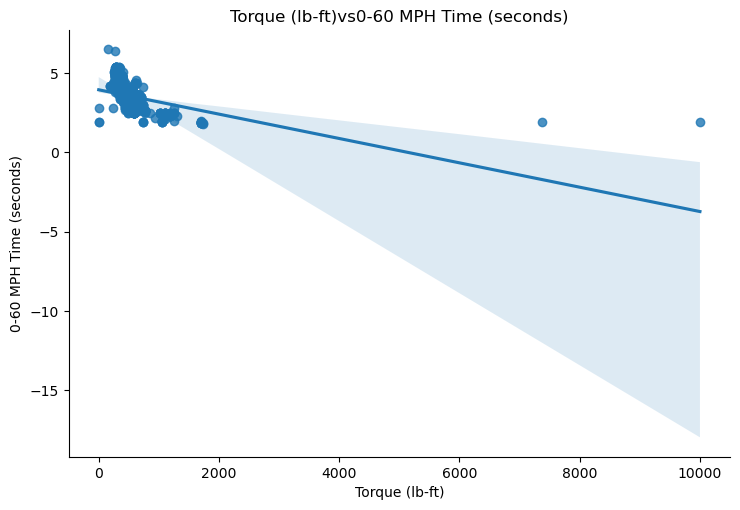

In [37]:
sns.lmplot(data=df, x ='Torque (lb-ft)', y='0-60 MPH Time (seconds)' , height =5 , aspect =1.5)
plt.title("Torque (lb-ft)vs0-60 MPH Time (seconds)")
plt.show()

In [38]:
# columns to clean:
cols_to_clean = ['Horsepower','Torque (lb-ft)','0-60 MPH Time (seconds)','Price (in USD)']
for col in cols_to_clean:
    df[col] = df[col].astype(str).str.replace('[^0-9.]','',regex=True)
    df[col] = pd.to_numeric(df[col],errors= 'coerce')

df_clean = df[cols_to_clean].dropna()

In [39]:
# High positive correlation (close to 1) with Price (in USD) means that column increases as price increases.
# Negative correlation means inverse relation (e.g., 0-60 MPH time may decrease as price increases).
# Near 0 means no strong linear relationship.
correlation_matrix = df_clean.corr()

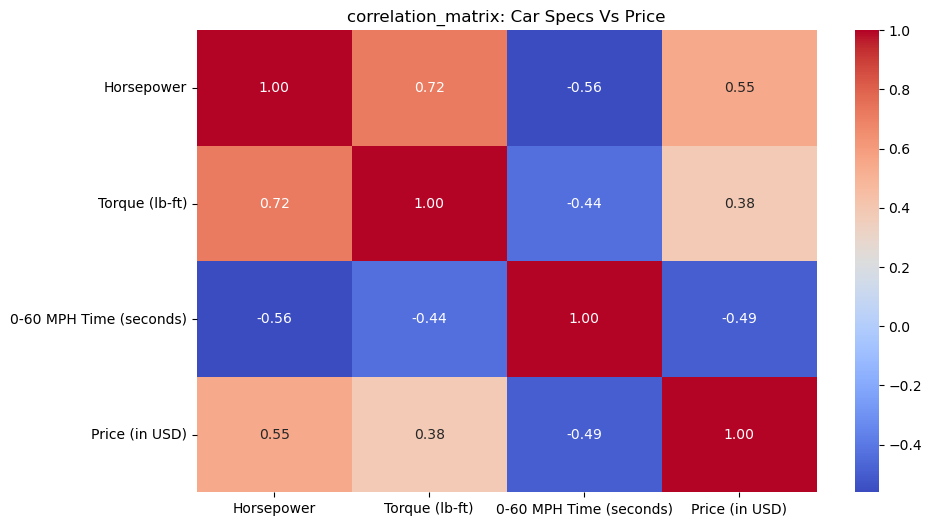

In [40]:
plt.figure(figsize =(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('correlation_matrix: Car Specs Vs Price')
plt.show()

In [41]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')


In [42]:
df['0-60 MPH Time (seconds)'] = df['0-60 MPH Time (seconds)'].astype(str).str.replace('[^0-9.]', '',regex=True)
df['0-60 MPH Time (seconds)'] = pd.to_numeric(df['0-60 MPH Time (seconds)'],errors ='coerce')

df['Horsepower'] = df['Horsepower'].astype(str).str.replace('[^0-9.]', '',regex=True)
df['Horsepower'] = pd.to_numeric(df['Horsepower'],errors ='coerce')

In [43]:
performance_by_year = df.groupby('Year')[['Horsepower','0-60 MPH Time (seconds)']].mean().dropna()

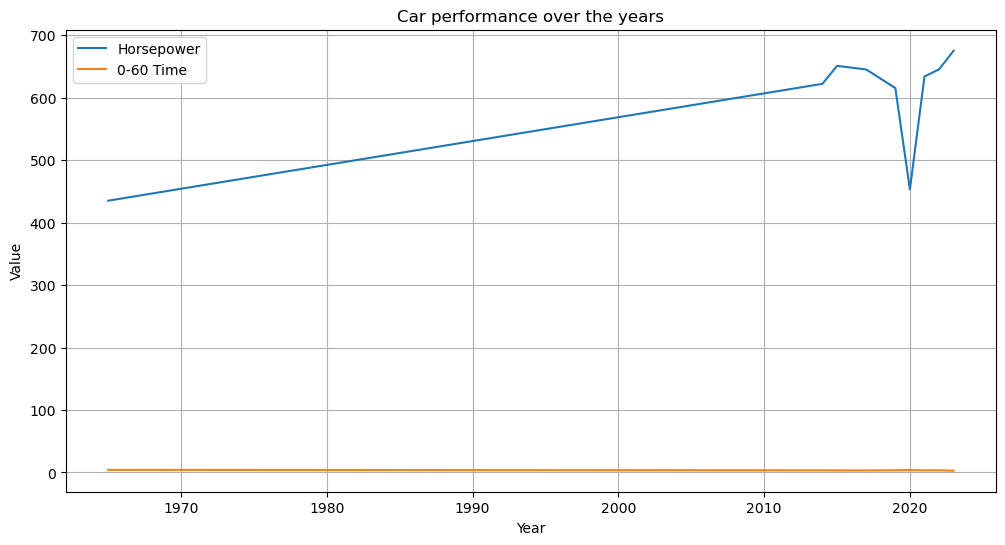

In [44]:
plt.figure(figsize=(12,6))
sns.lineplot(data=performance_by_year, x=performance_by_year.index, y='Horsepower', label='Horsepower')
sns.lineplot(data=performance_by_year, x=performance_by_year.index, y='0-60 MPH Time (seconds)', label='0-60 Time')
plt.title('Car performance over the years')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [45]:
# How has car performance evolved over the years (e.g., horsepower or 0-60 time)?
# Converting Year to numeric:
df['Year'] =pd.to_numeric(df['Year'], errors='coerce')

In [46]:
# cleaning Horsepowerand 0-60 MH time:
df['Horsepower'] = df['Horsepower'].astype(str).str.replace('[^0-9.]', '',regex=True)
df['Horsepower'] = pd.to_numeric(df['Horsepower'],errors ='coerce')

df['0-60 MPH Time (seconds)'] = df['0-60 MPH Time (seconds)'].astype(str).str.replace('[^0-9.]', '',regex=True)
df['0-60 MPH Time (seconds)'] = pd.to_numeric(df['0-60 MPH Time (seconds)'],errors ='coerce')

In [47]:
# Grouping By year and calculating mean:
performance_trends = df.groupby('Year')[['Horsepower','0-60 MPH Time (seconds)']].mean().dropna()

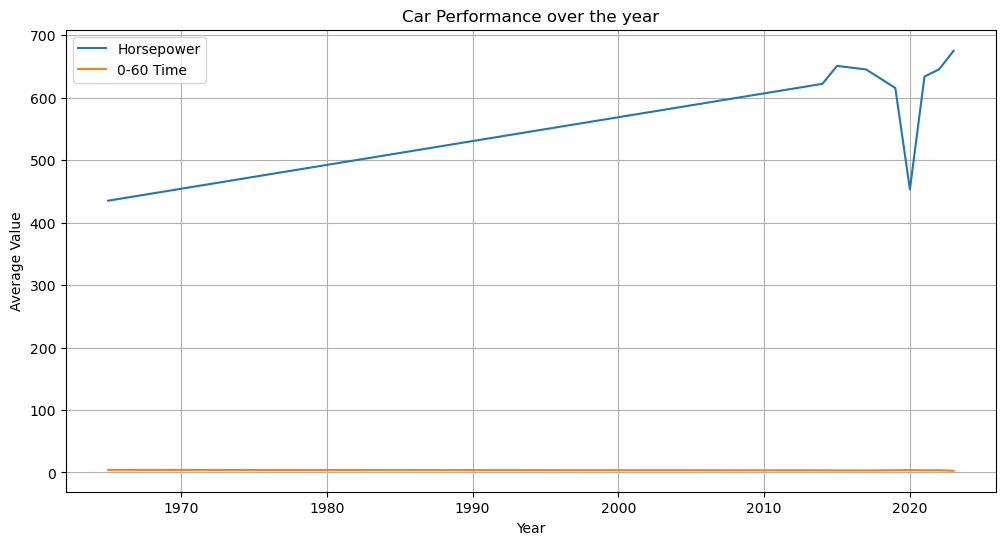

In [48]:
plt.figure (figsize = (12,6))
sns.lineplot(data=performance_by_year, x=performance_by_year.index, y='Horsepower', label='Horsepower')
sns.lineplot(data=performance_by_year, x=performance_by_year.index, y='0-60 MPH Time (seconds)', label='0-60 Time')
plt.title('Car Performance over the year')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()
plt.grid()
plt.show()

In [49]:
# Are newer models generally faster or more expensive?:
# cleaning Horsepowerand 0-60 MH time:
df['0-60 MPH Time (seconds)'] = df['0-60 MPH Time (seconds)'].astype(str).str.replace('[^0-9.]', '',regex=True)
df['0-60 MPH Time (seconds)'] = pd.to_numeric(df['0-60 MPH Time (seconds)'],errors ='coerce')

df['Price (in USD)'] = df['Price (in USD)'].astype(str).str.replace('[^0-9.]', '',regex=True)
df['Price (in USD)'] = pd.to_numeric(df['Price (in USD)'],errors ='coerce')

In [50]:
# Grouping By year and calculating mean:
trend = df.groupby('Year')[['Price (in USD)', '0-60 MPH Time (seconds)']].mean().dropna()

In [51]:
print (trend.columns)

Index(['Price (in USD)', '0-60 MPH Time (seconds)'], dtype='object')


In [52]:
print (df.columns)

Index(['Car Make', 'Car Model', 'Year', 'Engine Size (L)', 'Horsepower',
       'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Price (in USD)'],
      dtype='object')


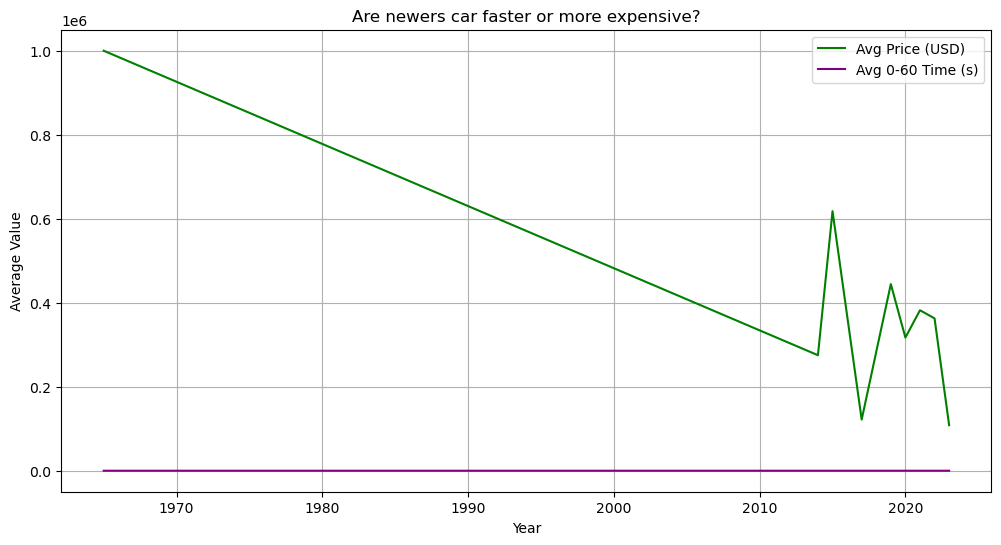

In [53]:
plt.figure (figsize = (12,6))
# Plot Average Price
sns.lineplot(x=trend.index, y='Price (in USD)', data=trend, label='Avg Price (USD)', color='green')

# Plot 0-60 Time
sns.lineplot(x=trend.index, y='0-60 MPH Time (seconds)', data=trend, label='Avg 0-60 Time (s)', color='purple')

plt.title('Are newers car faster or more expensive?')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()
plt.grid()
plt.show()

In [54]:
# Remove rows with missing Horsepower or Price:
df_perf = df[['Car Make','Horsepower','Price (in USD)']].dropna()
print (df_perf)

         Car Make  Horsepower  Price (in USD)
0         Porsche       379.0        101200.0
1     Lamborghini       630.0        274390.0
2         Ferrari       661.0        333750.0
3            Audi       562.0        142700.0
4         McLaren       710.0        298000.0
...           ...         ...             ...
1002   Koenigsegg      1280.0       3000000.0
1003        Lotus      1972.0       2000000.0
1004      McLaren       789.0       1000000.0
1005       Pagani       764.0       2600000.0
1006        Rimac      1888.0       2400000.0

[997 rows x 3 columns]


In [55]:
#  converting horsepower and price are float:
df_perf ['Horsepower'] = df_perf['Horsepower'].astype(float)
df_perf ['Price (in USD)'] = df_perf['Price (in USD)'].astype(float)

In [56]:
# calculate performance per dollar:
df_perf ['Performance per dollar'] = df_perf['Horsepower']/df_perf['Price (in USD)']

In [57]:
# grouping by car make and get the average by performance per dollar:
best_value = df_perf.groupby('Car Make')['Performance per dollar'].mean().sort_values(ascending = False)

<Axes: xlabel='Car Make'>

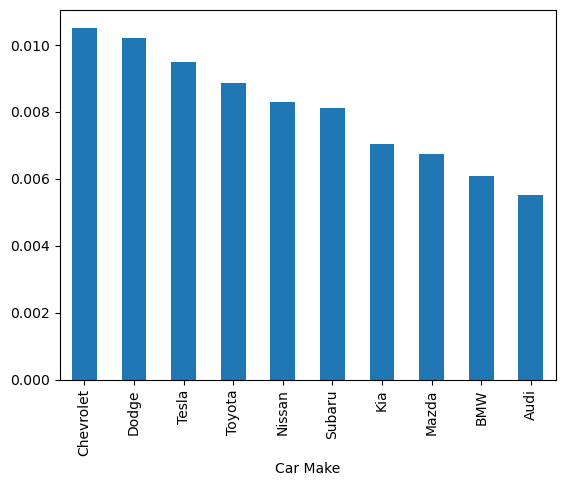

In [58]:
best_value.head(10).plot(kind='bar')

In [59]:
plot_df = best_value.head(10).reset_index()

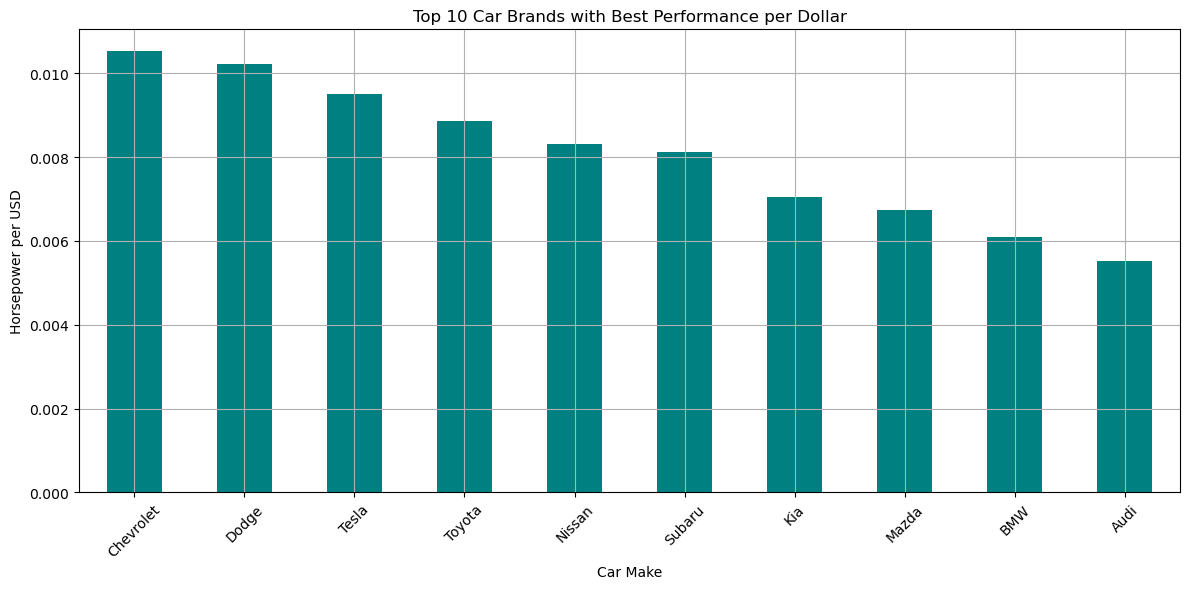

In [60]:
plt.figure (figsize =(12,6))
best_value.head(10).plot(kind ='bar', color= 'teal')
plt.title('Top 10 Car Brands with Best Performance per Dollar')
plt.xlabel('Car Make')
plt.ylabel('Horsepower per USD')
plt.xticks(rotation = 45)
plt.grid()
plt.tight_layout()
plt.show()

In [61]:
print(plot_df.dtypes)
print(plot_df.head ())

Car Make                   object
Performance per dollar    float64
dtype: object
    Car Make  Performance per dollar
0  Chevrolet                0.010522
1      Dodge                0.010218
2      Tesla                0.009508
3     Toyota                0.008869
4     Nissan                0.008302


In [62]:
# Which brands balance torque, speed, and cost best?
df_clean = df.dropna(subset =['Torque (lb-ft)','0-60 MPH Time (seconds)','Price (in USD)'])

In [63]:
# Convert to numeric if not already:
df_clean['Torque (lb-ft)'] = pd.to_numeric(df_clean['Torque (lb-ft)'], errors = 'coerce')
df_clean['0-60 MPH Time (seconds)'] = pd.to_numeric(df_clean['0-60 MPH Time (seconds)'], errors = 'coerce')
df_clean['Price (in USD)'] = pd.to_numeric(df_clean['Price (in USD)'], errors = 'coerce')

In [66]:
# Drop rows with Nans:
df_clean = df_clean.dropna(subset = ['Torque (lb-ft)','0-60 MPH Time (seconds)','Price (in USD)'])

In [68]:
# cleaning performance:
df_clean['Performance score'] = df_clean['Torque (lb-ft)']/(df_clean['0-60 MPH Time (seconds)'] * df_clean['Price (in USD)'])

In [71]:
# Group by Car Make:
# # Show top 10
brand_performance = df_clean.groupby('Car Make')['Performance score'].mean().sort_values(ascending = False)
print(brand_performance.head(10))

Car Make
Tesla        0.005570
Chevrolet    0.002899
Dodge        0.002615
Ultima       0.002569
Toyota       0.002191
Kia          0.001533
Subaru       0.001525
Audi         0.001495
BMW          0.001471
Nissan       0.001386
Name: Performance score, dtype: float64


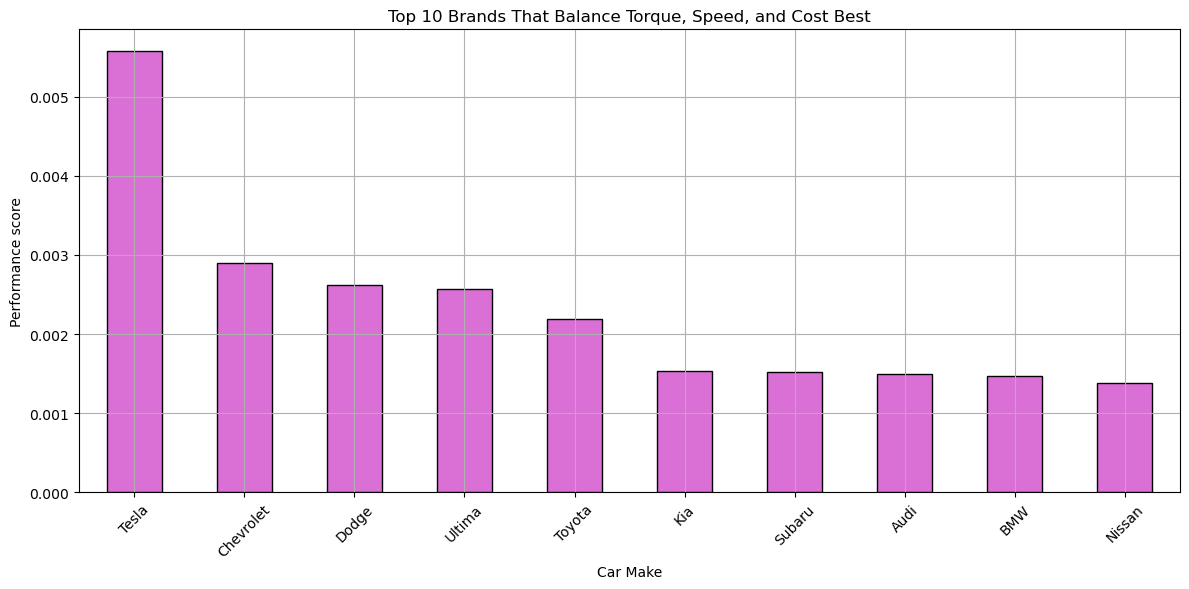

In [73]:
plt.figure (figsize = (12,6))
brand_performance.head(10).plot(kind ='bar', color ='orchid', edgecolor ='black')
plt.title('Top 10 Brands That Balance Torque, Speed, and Cost Best')
plt.xlabel('Car Make')
plt.ylabel('Performance score')
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Number of cars')

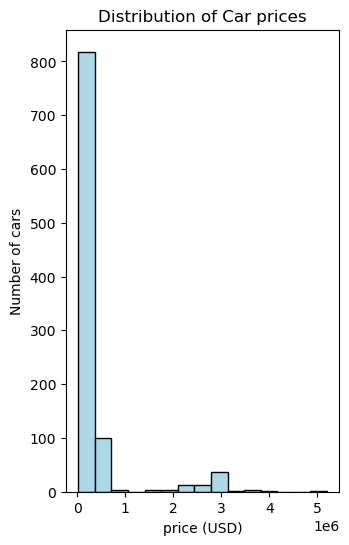

In [77]:
plt.figure(figsize = (12,6))

#  Histogram for Price:
plt.subplot(1,3,1)
plt.hist(df_clean['Price (in USD)'], bins=15, color='lightblue', edgecolor='black')
plt.title('Distribution of Car prices')
plt.xlabel('price (USD)')
plt.ylabel('Number of cars')

Text(0.5, 0, 'Horsepower')

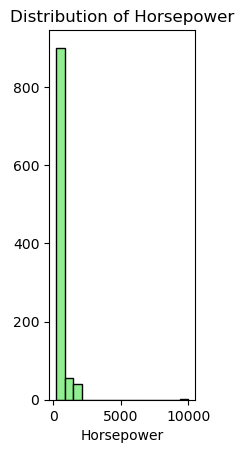

In [78]:
# histogram for horsepower:
plt.subplot(1,3,2)
plt.hist(df_clean['Horsepower'], bins=15, color='lightgreen', edgecolor='black')
plt.title('Distribution of Horsepower')
plt.xlabel('Horsepower')

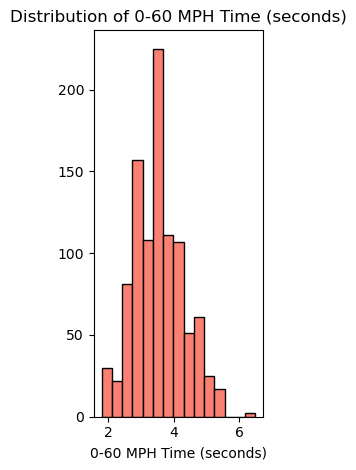

In [81]:
#  Histogram for 0-60 MPH time:
plt.subplot(1,3,3)
plt.hist(df_clean['0-60 MPH Time (seconds)'], bins=15, color='Salmon', edgecolor='black')
plt.title('Distribution of 0-60 MPH Time (seconds)')
plt.xlabel('0-60 MPH Time (seconds)')

plt.tight_layout()
plt.show()

In [82]:
print(df_clean.columns.tolist())

['Car Make', 'Car Model', 'Year', 'Engine Size (L)', 'Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Price (in USD)', 'Performance score']


C:\Users\WINDOWS10\AppData\Local\Temp\ipykernel_11624\4035407091.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot (data =df_clean, x ='Car Make', y = 'Price (in USD)', palette = 'Set3')


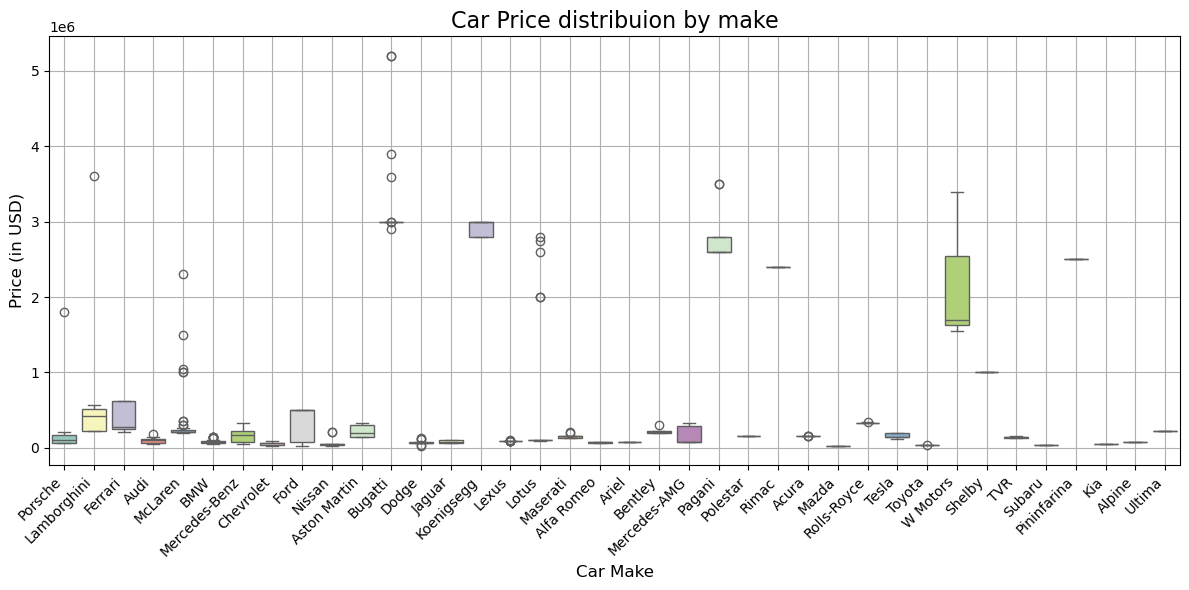

In [83]:
# Boxplot: Price by Car Make:
plt.figure (figsize =(12,6))
sns.boxplot (data =df_clean, x ='Car Make', y = 'Price (in USD)', palette = 'Set3')
plt.title('Car Price distribuion by make', fontsize =16)
plt.xlabel('Car Make', fontsize = 12)
plt.ylabel('Price (in USD)', fontsize = 12)
plt.xticks(rotation = 45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

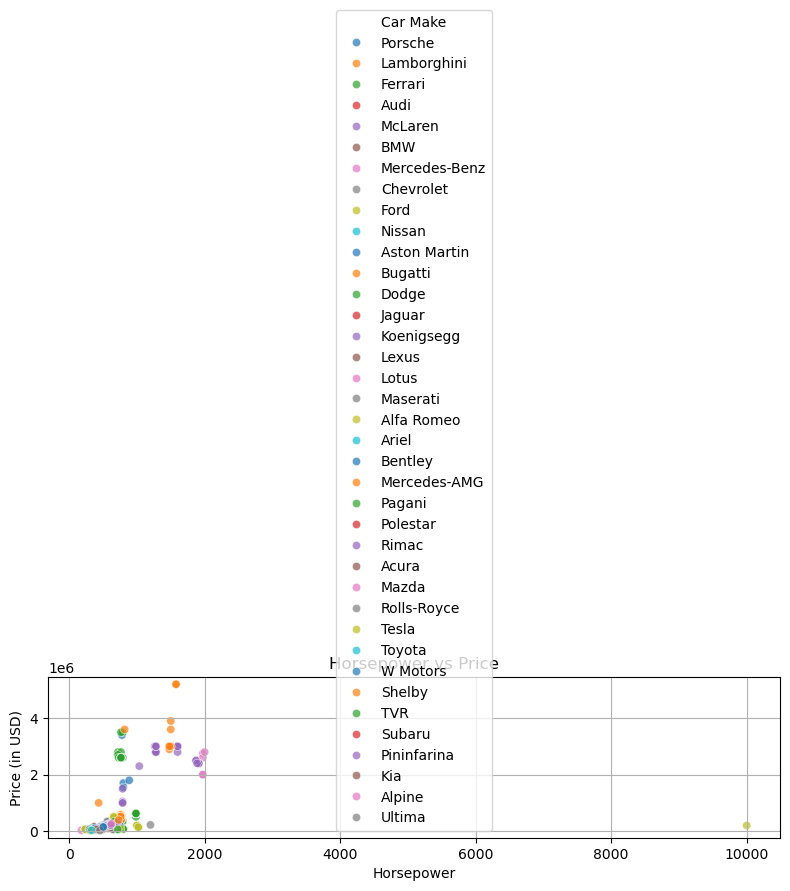

In [85]:
#  Horsepower vs. Price:
plt.figure (figsize=(8,6))
sns.scatterplot(data =df_clean , x= 'Horsepower', y= 'Price (in USD)', hue= 'Car Make', palette ='tab10', alpha =0.7)
plt.title('Horsepower vs Price')
plt.xlabel('Horsepower')
plt.ylabel('Price (in USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

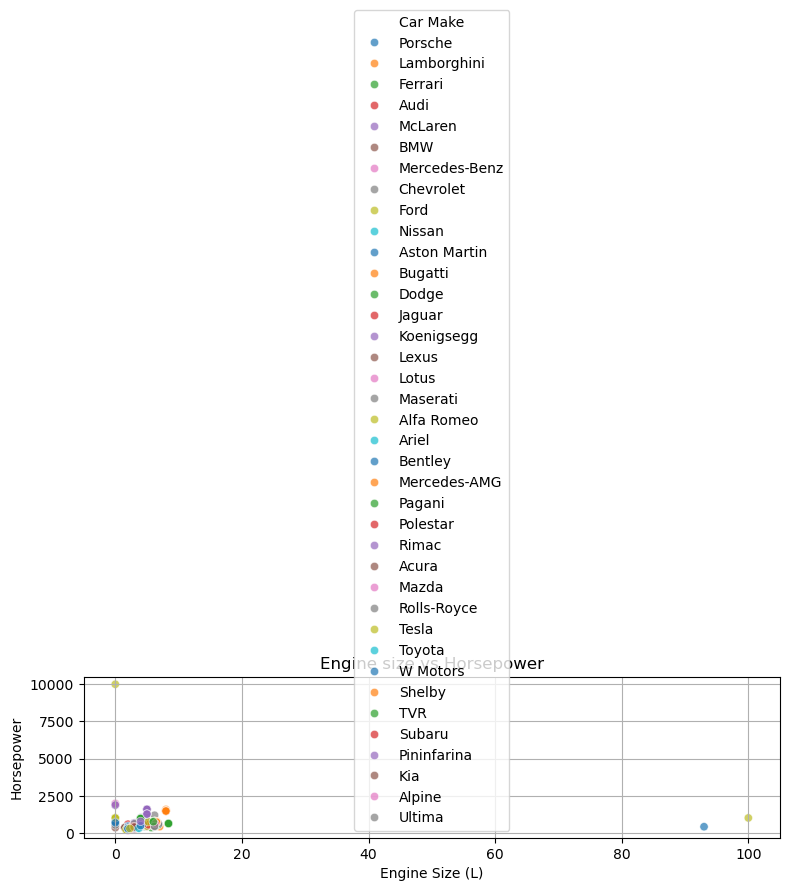

In [84]:
#  Engine Size vs. Horsepower :
plt.figure (figsize=(8,6))
sns.scatterplot(data =df_clean , x= 'Engine Size (L)', y= 'Horsepower', hue= 'Car Make', palette ='tab10', alpha =0.7)
plt.title('Engine size vs Horsepower')
plt.xlabel('Engine Size (L)')
plt.ylabel('Horsepower')
plt.grid(True)
plt.tight_layout()
plt.show()

In [88]:
# Select only numerical column:
numeric_df = df_clean.select_dtypes(include=['float64', 'int64'])


In [89]:
# compute correlation matrix :
corr_matrix = numeric_df.corr()

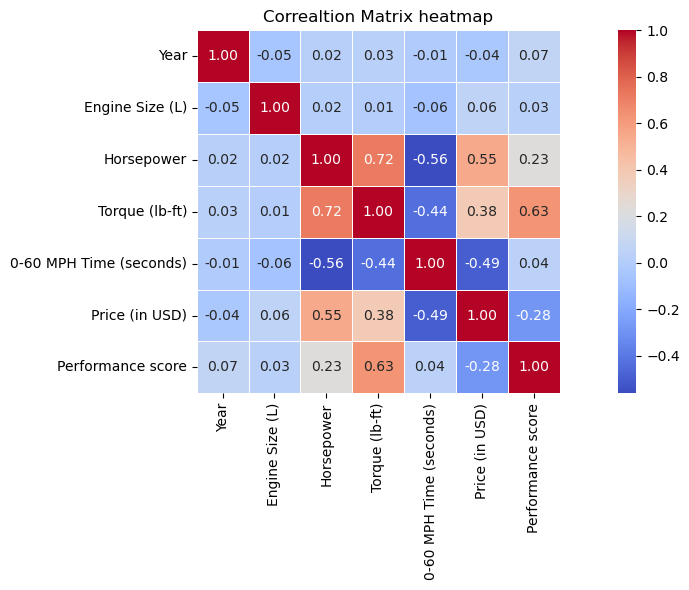

In [92]:
# plot Heatmap:
plt.figure (figsize= (12,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Correaltion Matrix heatmap')
plt.tight_layout()
plt.show()